In [1]:
import numpy as np
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

dailyURL = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
all_data = pd.read_csv(dailyURL)
all_data.dateRep = pd.to_datetime(all_data['dateRep'],format='%d/%m/%Y')
all_data = all_data[['dateRep','cases','deaths','countryterritoryCode','popData2018']]

In [2]:
sorted_data = all_data.sort_values(['countryterritoryCode','dateRep'])
cumulative_data = sorted_data.groupby(['countryterritoryCode', 'dateRep','popData2018']).agg({'cases':'sum','deaths':'sum','popData2018':'first'}).groupby(level=0).agg({'cases':'cumsum','deaths':'cumsum'}).reset_index()
cumulative_data['case_percent'] = cumulative_data['cases'] *1000000/ cumulative_data.popData2018
cumulative_data['death_percent'] = cumulative_data['deaths'] *1000000/ cumulative_data.popData2018
cumulative_data = cumulative_data[cumulative_data.case_percent > 1]

In [3]:
# list of countries you want to compare
country_list = ['USA','CAN','DEU','FRA','ITA','ESP','KOR','JPN','SGP','ZAF','TWN','NZL']

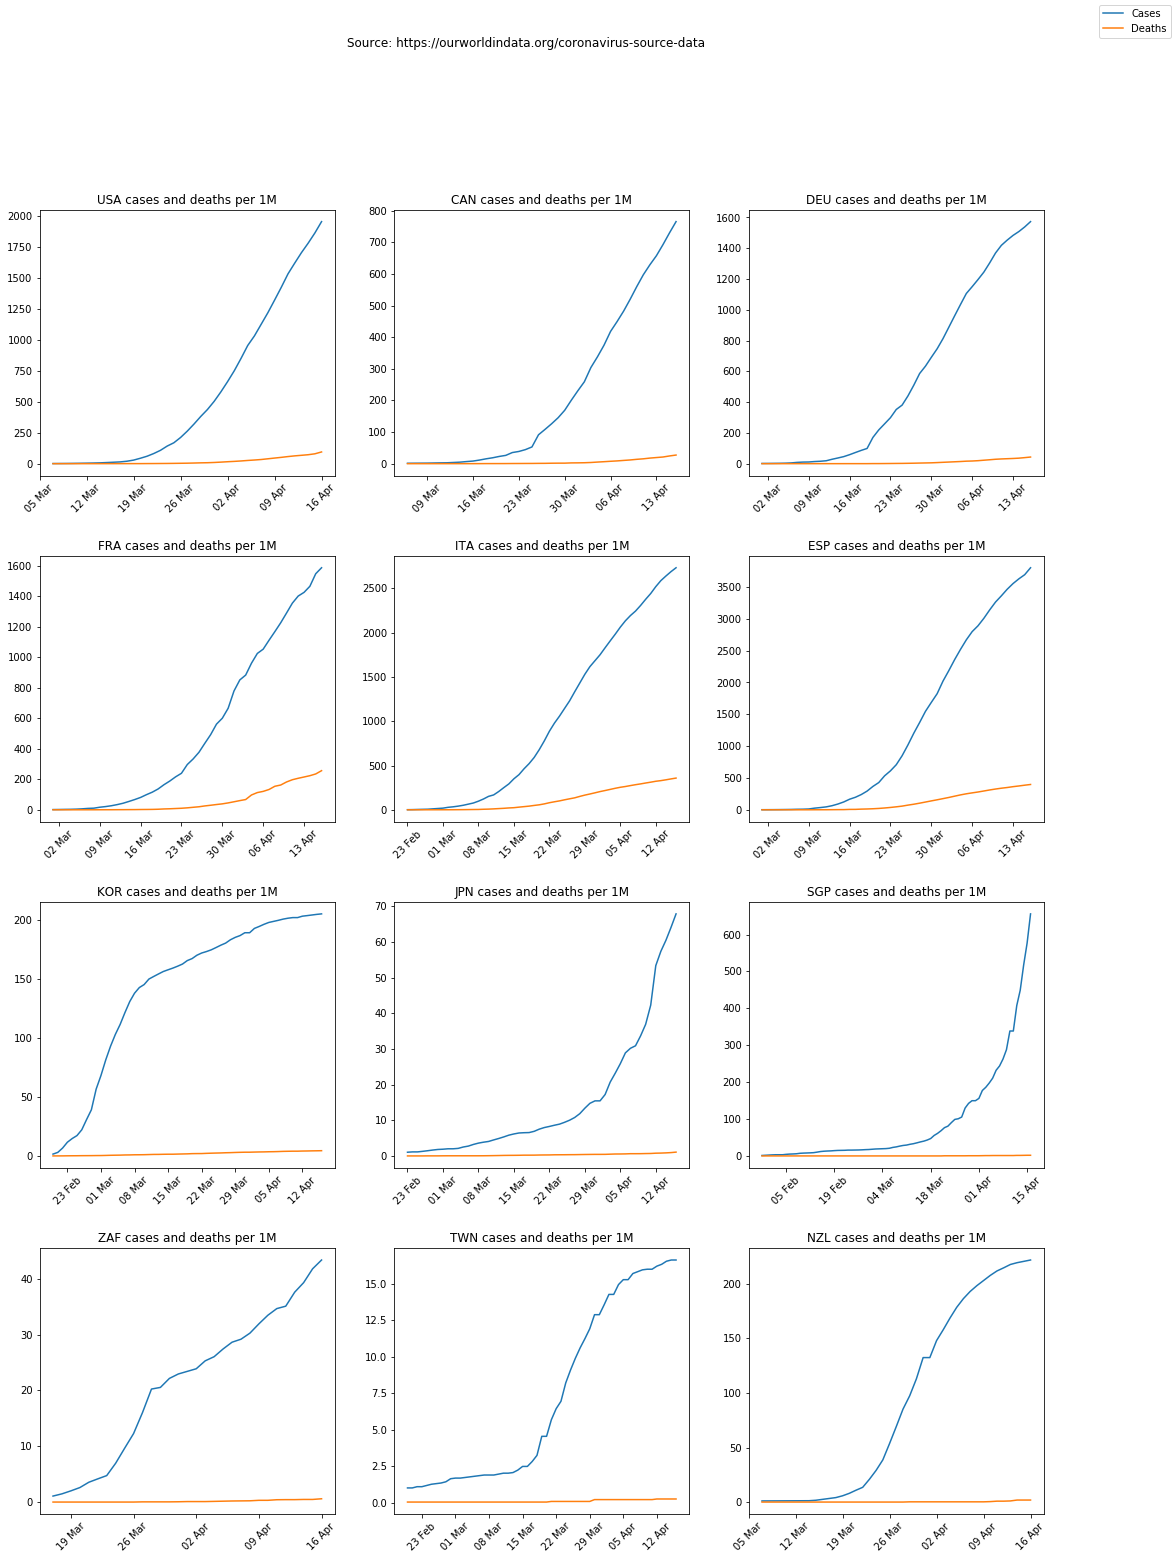

In [4]:
fig, (ax) = plt.subplots(6,figsize=(18,24),sharey=True)
fig.suptitle('Source: https://ourworldindata.org/coronavirus-source-data')

# get the max case per 1M in the country list
subset_data = cumulative_data.loc[cumulative_data.countryterritoryCode.isin(country_list)]
mymax = subset_data.case_percent.max()

for c in country_list:
    country_data = cumulative_data.loc[cumulative_data['countryterritoryCode'] == c]

    current_ax = plt.subplot(4,3,country_list.index(c) + 1)
    #current_ax.set_ylim(0,mymax)
    current_ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
    current_ax.plot(country_data.dateRep,country_data.case_percent)
    current_ax.plot(country_data.dateRep,country_data.death_percent)
    
    plt.title(c + " cases and deaths per 1M")
    plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=0.3)
    
handles, labels = current_ax.get_legend_handles_labels()
fig.legend(handles, labels=['Cases','Deaths'], loc='upper right')



In [5]:
# smaller list of countries
country_list = ['USA','CAN','FRA','ITA','ESP','NZL']

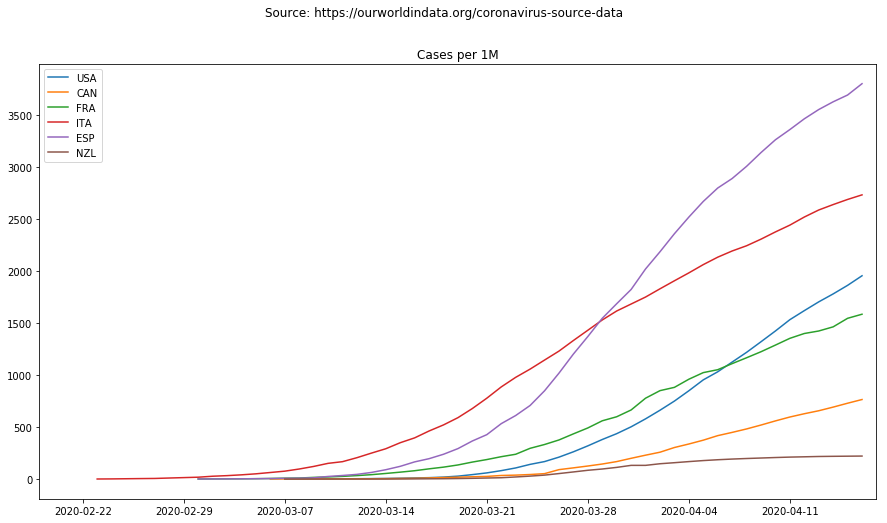

In [6]:
# compare cases on same graph
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('Source: https://ourworldindata.org/coronavirus-source-data')

for c in country_list:
    df2 = cumulative_data.loc[cumulative_data['countryterritoryCode'] == c]
    plt.plot(df2.dateRep,df2.case_percent, label = c)
    ax.set_xlim(datetime.date(2020, 2, 19), datetime.date.today()+ datetime.timedelta(days=1))
plt.legend()
plt.title("Cases per 1M")

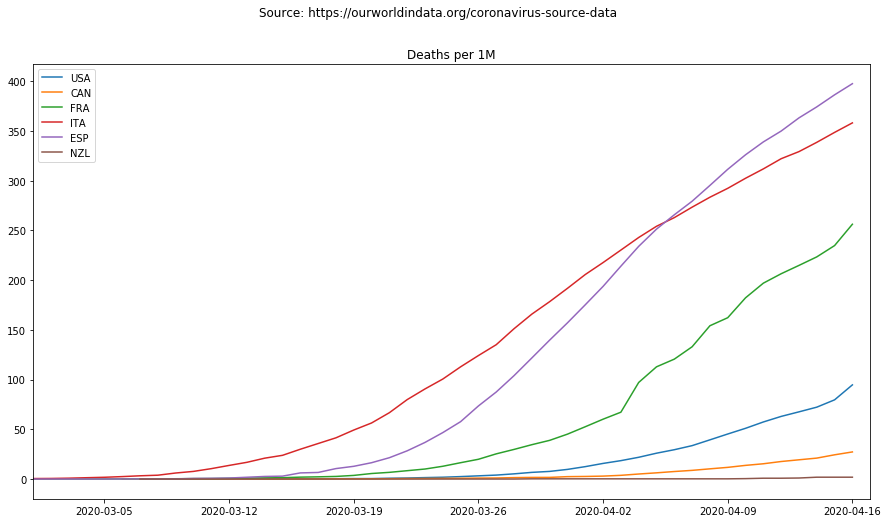

In [7]:
# compare deaths on same graph
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('Source: https://ourworldindata.org/coronavirus-source-data')

for c in country_list:
    df2 = cumulative_data.loc[cumulative_data['countryterritoryCode'] == c]
    plt.plot(df2.dateRep,df2.death_percent, label = c)
    ax.set_xlim(datetime.date(2020, 3, 1), datetime.date.today()+ datetime.timedelta(days=1))

plt.legend()
plt.title("Deaths per 1M")


## Don't see a country you're interested in? Enter it below:

Country Tri-graph
CRI


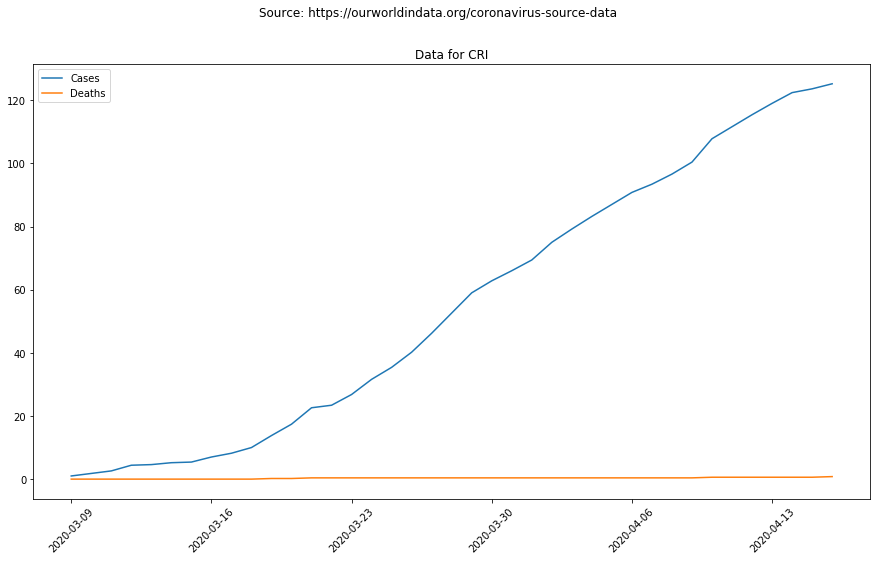

In [29]:
test_country = input("Country Tri-graph\n").upper()
if test_country not in all_data.countryterritoryCode.values:
    print("Not a valid country code")
else:
    fig, ax = plt.subplots(figsize=(15,8))
    fig.suptitle('Source: https://ourworldindata.org/coronavirus-source-data')

    df = cumulative_data.loc[cumulative_data['countryterritoryCode'] == test_country]
    plt.plot(df.dateRep,df.case_percent)
    plt.plot(df.dateRep,df.death_percent)
    
    plt.legend()
    plt.xticks(rotation=45)
    plt.title("Data for " + test_country)
    ax.legend(labels=['Cases','Deaths'])